In [43]:
#importing the dependencies

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [50]:
image = cv2.imread('Pictures/download (1).jpg',0)

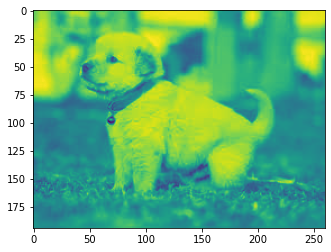

In [51]:
#original image

plt.imshow(image)

In [52]:
float_image = np.float32(image)

In [53]:
image.shape

(194, 260)

Take the 2D DFT of fx, multiply it pixel by pixel with the 2D DFT of the image, and then take the 2D IDFT back into the spatial domain. This would then also give you Gx.

In [5]:
#fourier transforming the image using numpy.fft2
fourier_transform_image = np.fft.fft2(image)

In [6]:
#getting the spectrum of the transformed image 

spectrum = np.fft.fftshift(np.fft.fft2(float_image))

In [7]:
fourier_transform_image = np.float32(fourier_transform_image)

<ipython-input-7-e62054aabe33>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  fourier_transform_image = np.float32(fourier_transform_image)


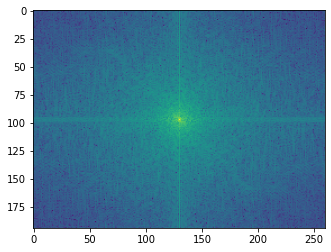

In [8]:
plt.imshow(20* np.log(abs(spectrum)))

In [9]:
#getting the Gradient in x axis of the image

image_X = cv2.Sobel(image, cv2.CV_8UC1, 1, 0)

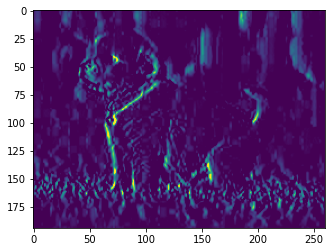

In [10]:
plt.imshow(image_X)

In [11]:
#getting the gradients of the image through y-axis

image_Y = cv2.Sobel(image,cv2.CV_8UC1, 0, 1)

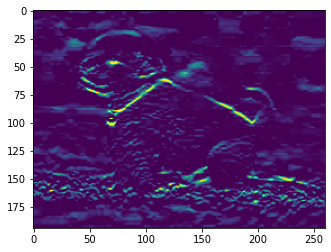

In [12]:
plt.imshow(image_Y)

In [13]:
#now getting the discrete fourier transform of the Gradient along x axis of the image

image_x_fft2 = np.fft.fft2(image_X)

In [14]:
# retrieving the discrete fourier transform of the Gradient along y axis of the image

image_y_fft2 = np.fft.fft2(image_Y)

In [15]:
# now multiplying the spectrum which we got from the fourier transform of the image and the fourier transform of gradient of x

x_gradient_fourier = cv2.multiply(np.float32(spectrum), np.float32(image_x_fft2))

<ipython-input-15-ef63a7a872b9>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  x_gradient_fourier = cv2.multiply(np.float32(spectrum), np.float32(image_x_fft2))


# Now To retrieve the Gradient Along X axis of the image Using FFt2, we do the inverse transform of the array to convert into to spatial domain which we generated while multiplying the(spectrum, and fourier transform of gradient x of image)

In [16]:
img_back_x =np.fft.ifft2(np.fft.ifftshift(x_gradient_fourier))

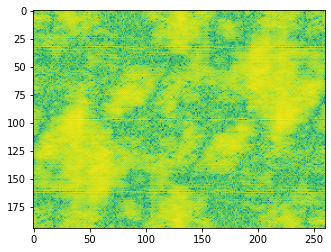

In [17]:
#plotting the gradients of the image which was obtained using the fft2

plt.imshow(20* np.log(abs(img_back_x)))

# Now To retrieve the Gradient Along Y axis of the image Using FFt2, we do the inverse transform of the array to convert into to spatial domain which we generated while multiplying the(spectrum, and fourier transform of gradient y of image)

In [18]:
y_gradient_fourier = cv2.multiply(np.float32(spectrum), np.float32(image_y_fft2))

<ipython-input-18-d492e8192b9d>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  y_gradient_fourier = cv2.multiply(np.float32(spectrum), np.float32(image_y_fft2))


In [19]:
#plotting the gradients of the image which was obtained using the fft2 (y-axis)

img_back_y =np.fft.ifft2(np.fft.ifftshift(y_gradient_fourier))

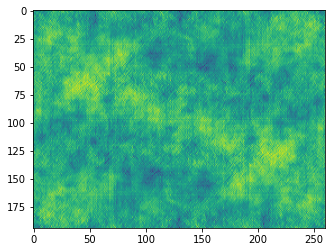

In [20]:
#plotting the obtained gradient using numpy.fft2 (y-axis)
plt.imshow(20* np.log(abs(img_back_y)))

image = [[183 185 189 ... 232 232 232]
 [183 185 189 ... 232 232 232]
 [184 186 189 ... 232 232 232]
 ...
 [130 129 128 ... 119 118 117]
 [124 124 124 ... 119 119 119]
 [124 124 124 ... 119 119 119]]
gx = [[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.5  0.5  0.  ...  0.   0.   0. ]
 [ 0.5  0.5  0.5 ...  0.   0.   0. ]
 ...
 [-2.5 -2.5 -1.5 ...  0.   0.5  1. ]
 [-3.  -2.5 -2.  ...  0.   0.5  1. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]
gy = [[ 2.   3.   4.5 ... -0.5  0.   0. ]
 [ 2.   3.   4.5 ... -0.5  0.   0. ]
 [ 2.   2.5  4.  ... -0.5  0.   0. ]
 ...
 [-1.  -1.  -1.5 ... -0.5 -1.  -1. ]
 [ 0.   0.  -0.5 ...  0.   0.   0. ]
 [ 0.   0.  -0.5 ...  0.   0.   0. ]]


<ipython-input-21-cdf9db59ebb8>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot("131")
<ipython-input-21-cdf9db59ebb8>:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot("132")
<ipython-input-21-cdf9db59ebb8>:22: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot("133")


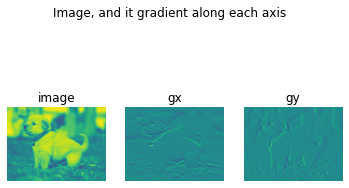

In [21]:
#Obtaining the gradients using np.gradient function

print( "image =", image)

# compute gradient of image
gx, gy = np.gradient(image)
print ("gx =", gx)
print ("gy =", gy)

# plotting
plt.close("all")
plt.figure()
plt.suptitle("Image, and it gradient along each axis")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(image)
ax.set_title("image")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(gx)
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(gy)
ax.set_title("gy")
plt.show()

# from above 2 functions which are used to obtained gradients we can see that the gradients obtained using np.fft2() is different from normal np.gradient()

# Using the np.ftt2() the gradients we get are kind of spectrum magnitude these gradients are obtained using the fourier transform along different axis

# Where as the simple np.gradient() gives use the gradients along different axis using the sobel edge detector

In [54]:

original_image = cv2.multiply(np.float32(x_gradient_fourier), np.float32(y_gradient_fourier))

In [55]:
img_back_obtained_from_gradients =np.fft.ifft2(np.fft.ifftshift(fourier_transform_image))

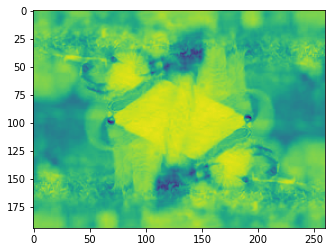

In [57]:
# RECONSTRUCTION THE IMAGE 
plt.imshow(20* np.log(abs(img_back_obtained_from_gradients)))

# 3. Getting the gussian white noise matrix with standard deviation = 1

In [22]:
#gaussian image
gaussian = np.random.normal(loc = 0, scale = 1,size = (224, 224))

In [30]:
#finding the power spectral density using np.fft for gaussian white noise

power_spectral = np.fft.rfft(gaussian)

abs_fourier_transform = np.abs(power_spectral)

power_spectrum = np.square(abs_fourier_transform)


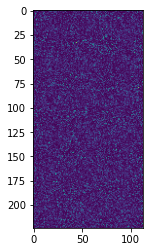

In [31]:
#plotting the power spectral density of the image
plt.imshow(power_spectrum)

In [32]:
power_spectrum

array([[123.7044039 ,  46.99719206, 295.77229908, ...,  93.70188919,
        209.69867288,   8.94749361],
       [ 98.8917498 ,  37.43945767, 102.08476113, ..., 684.89250563,
        268.73846402,  32.11129964],
       [ 35.02750961, 179.13095435, 286.88313707, ...,  76.7874733 ,
        126.32825752, 565.65614562],
       ...,
       [238.12337425,  94.94252625, 180.38344533, ...,  92.32034011,
        146.92916773,  36.92079328],
       [ 27.07242279,  60.93150109,  56.21539053, ..., 105.86732475,
         24.193003  ,  10.73049811],
       [  2.9034173 ,  20.18076707, 367.91008723, ..., 321.96281054,
        147.85768421, 581.85157629]])

image = [[ 0.57915348 -0.8491687   0.06503534 ...  0.92861195  0.40667119
   0.3784456 ]
 [ 0.20596047 -1.83727446  0.58472725 ...  0.0855646   0.18761829
   0.6532325 ]
 [ 1.43957459 -0.2805395   0.76529326 ... -0.93469963  0.59374644
  -0.09079933]
 ...
 [ 1.38645468 -0.37872702  0.53432946 ... -0.49689075 -3.10567107
  -0.05464879]
 [-0.50886202  1.2013261  -0.04152509 ... -0.01445568 -0.48520769
  -1.31567465]
 [-0.28242119 -0.54514707  0.43523792 ...  0.66445979 -0.65057065
  -0.48711093]]
gx = [[-0.37319302 -0.98810576  0.51969192 ... -0.84304734 -0.2190529
   0.2747869 ]
 [ 0.43021055  0.2843146   0.35012896 ... -0.93165579  0.09353763
  -0.23462247]
 [-0.65555722  1.52222357 -0.55510342 ... -0.45500665 -0.62160915
  -0.67426961]
 ...
 [ 0.41741747  1.75938763 -0.19821927 ... -0.55597567  0.31483098
  -1.78044562]
 [-0.83443793 -0.08321003 -0.04954577 ...  0.58067527  1.22755021
  -0.21623107]
 [ 0.22644083 -1.74647317  0.47676302 ...  0.67891547 -0.16536296
   0.82856372]]
gy =

<ipython-input-37-d853e36a6fef>:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot("131")
<ipython-input-37-d853e36a6fef>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot("132")
<ipython-input-37-d853e36a6fef>:23: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot("133")


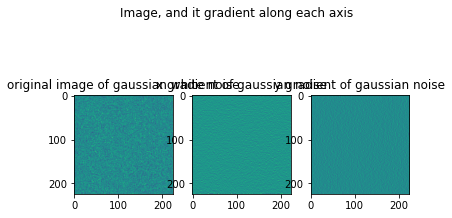

In [37]:
#estimitation gradients of this gaussian noise and finding it's power spectral density
print( "image =", gaussian)

# compute gradient of image
xgradient_ofnoise, y_gradient_ofnoise = np.gradient(gaussian)
print ("gx =", xgradient_ofnoise)
print ("gy =", y_gradient_ofnoise)

# plotting
plt.close("all")
plt.figure()
plt.suptitle("Image, and it gradient along each axis")
ax = plt.subplot("131")
#ax.axis("off")
ax.imshow(gaussian)
ax.set_title("original image of gaussian white noise")

ax = plt.subplot("132")
#ax.axis("off")
ax.imshow(xgradient_ofnoise)
ax.set_title("x gradient of gaussian noise")

ax = plt.subplot("133")
#ax.axis("off")
ax.imshow(y_gradient_ofnoise)
ax.set_title("y gradient of gaussian noise")
plt.show()

In [38]:
#calculating the power spectral density of the gradients of the gaussian white nosie 
#finding the power spectral density using np.fft for gaussian white noise

power_spectral_x_gradient = np.fft.rfft(xgradient_ofnoise)

abs_fourier_transform_x_gradient = np.abs(power_spectral_x_gradient)

power_spectrum_x_gradient = np.square(abs_fourier_transform_x_gradient)

Power spectral of gaussian noise gradient gx  [[1.38724828e+00 7.88940022e+01 6.38754140e+01 ... 1.12380571e+03
  8.80196462e+02 7.15801755e+00]
 [6.76999767e+00 1.95579757e+01 2.77694498e+02 ... 8.47038107e+01
  1.64908789e+02 1.79221982e+02]
 [1.57120761e-02 2.50824980e+01 4.42026869e+02 ... 2.69850370e+02
  1.72777186e+01 3.90538632e+01]
 ...
 [9.50219455e+01 1.87947522e+02 2.51647254e+02 ... 2.48645421e+01
  7.32801403e+01 3.20473757e+01]
 [4.71097256e+01 1.05128226e+01 2.07019853e+02 ... 2.16236004e+01
  8.10566085e+01 2.27977507e+02]
 [4.77074549e+01 1.10423115e+01 5.67840130e+02 ... 7.97027198e+02
  9.00790778e+01 4.34549708e+02]]


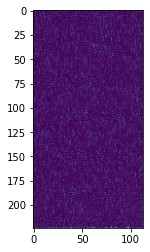

In [39]:
print("Power spectral of gaussian noise gradient gx " , power_spectrum_x_gradient)
plt.imshow(power_spectrum_x_gradient)

In [40]:
#calculating the power spectral density of the gradients of the gaussian white nosie 
#finding the power spectral density using np.fft for gaussian white noise

power_spectral_y_gradient = np.fft.rfft(y_gradient_ofnoise)

abs_fourier_transform_y_gradient = np.abs(power_spectral_y_gradient)

power_spectrum_y_gradient = np.square(abs_fourier_transform_y_gradient)

Power spectral of gaussian noise gradient gy  [[0.86300712 0.62305106 3.18875778 ... 0.16667779 0.96223254 0.49006762]
 [0.11664843 0.06994768 0.6360105  ... 7.35227892 0.74764987 1.573581  ]
 [7.46767041 7.10895498 5.99709622 ... 0.99147293 0.14957548 0.26810043]
 ...
 [0.63709639 0.75717521 0.69807272 ... 4.44774337 4.8813588  5.79895517]
 [0.13465381 0.29056753 0.21909701 ... 0.71235706 1.98260722 1.61373206]
 [0.0646801  0.12259405 0.9031271  ... 0.70278674 0.05985255 0.04540854]]


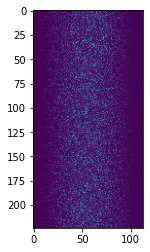

In [47]:
print("Power spectral of gaussian noise gradient gy " , power_spectrum_y_gradient)
plt.imshow(power_spectrum_y_gradient)